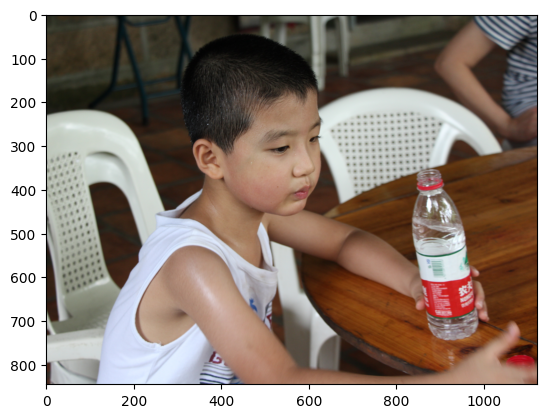

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

sample_image = Image.open("raw_benny/22e3886ffd78135a69bd74e0fa5d0615.png")
_ = plt.imshow(sample_image)

sample_image = sample_image.convert('RGB')
image_array = np.array(sample_image)

In [2]:
image_array.shape

(845, 1123, 3)

In [3]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
faces = detector.detect_faces(image_array)

2024-08-06 19:22:18.825160: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-06 19:22:18.825179: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-08-06 19:22:18.825186: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-08-06 19:22:18.825225: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-06 19:22:18.825237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-08-06 19:22:20.044470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


In [4]:
faces

[{'box': [398, 164, 237, 303],
  'confidence': 0.999993085861206,
  'keypoints': {'left_eye': (538, 305),
   'right_eye': (615, 280),
   'nose': (620, 355),
   'mouth_left': (548, 415),
   'mouth_right': (616, 389)}}]

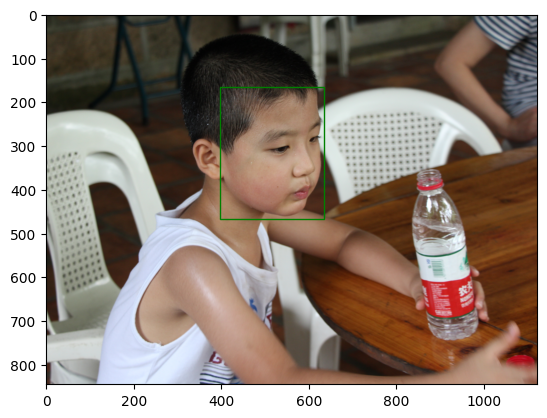

In [5]:
plt.imshow(sample_image)
ax = plt.gca()
x, y, width, height = faces[0]["box"]
rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
ax.add_patch(rect)
plt.show()

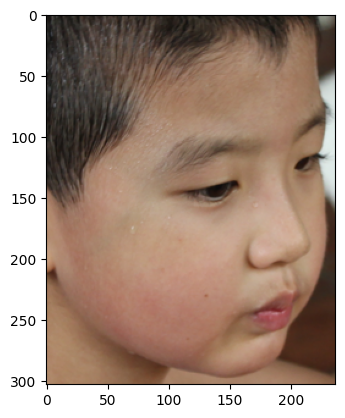

In [6]:
cropped_image = sample_image.crop((x, y, x + width, y + height))
_ = plt.imshow(cropped_image)